In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boats = pd.read_csv('boats.csv')
charters = pd.read_csv('charters.csv')

#### explore boats 

In [12]:
boats.head()

,boat_type,charter_id,boat_model,year,length,draft,beam,fuel_capacity,cabins,nr_guests,country_name,region
0,sailboat,1426,Cruiser 34,2009,10.70,1.90,3.60,150.0,2,6,Germany,North & Baltic sea
1,sailboat,1551,56.1,2009,17.00,2.30,5.10,750.0,5,12,Greece,Mediterranean
2,catamaran,1219,620,2019,18.90,1.55,10.00,2650.0,5,10,Greece,Mediterranean
3,sailboat,2233,455 Grand Large,2005,13.76,2.06,4.30,250.0,4,9,Finland,North & Baltic sea
4,sailboat,778,53,2010,16.06,2.28,4.77,240.0,6,12,Italy,Mediterranean


In [3]:
boats.describe()

,charter_id,year,length,draft,beam,fuel_capacity,cabins,nr_guests
count,17643.000000,17643.000000,17643.000000,12893.000000,14551.000000,13482.000000,17643.000000,17643.000000
mean,2143.701581,2011.837103,13.361713,2.181591,5.043383,655.177644,3.172760,9.991045
std,1492.768190,23.169566,5.868822,14.128848,9.575193,2265.098100,2.085865,10.002626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,889.000000,2008.000000,10.710000,1.210000,3.670000,174.250000,2.000000,8.000000
50%,1777.000000,2015.000000,12.800000,1.730000,4.340000,240.000000,3.000000,9.000000
75%,3401.000000,2018.000000,14.600000,2.090000,6.150000,500.000000,4.000000,11.000000
max,5322.000000,2022.000000,55.000000,999.990000,725.000000,105000.000000,25.000000,300.000000


the year column seems to have some strange values, like 0 for example and 2022 (future)

In [4]:
boats.isna().sum()

boat_type           0
charter_id          0
boat_model          0
year                0
length              0
draft            4750
beam             3092
fuel_capacity    4161
cabins              0
nr_guests           0
country_name        0
region              0
dtype: int64

we see that columns such as draft, beam, and fuel capacity have a lot of null values. We could just simply take the median value and fill the NaNs with it

In [5]:
boats['draft'].fillna(boats['draft'].median(), inplace=True)
boats['beam'].fillna(boats['beam'].median(), inplace=True)
boats['fuel_capacity'].fillna(boats['fuel_capacity'].median(), inplace=True)

In [6]:
boats.isna().sum()

boat_type        0
charter_id       0
boat_model       0
year             0
length           0
draft            0
beam             0
fuel_capacity    0
cabins           0
nr_guests        0
country_name     0
region           0
dtype: int64

we can see there is no null values anymore

In [8]:
# count number of boats per boat type
boats.groupby('boat_type')['boat_type'].count()

boat_type
catamaran         3358
gulet              770
houseboat          450
motorboat         2938
motorcatamaran     168
rib               1063
sailboat          7355
speedboat         1541
Name: boat_type, dtype: int64

most of boats are sailboats, followed by catamarans and motorboats

In [51]:
# count number of boats per boat type
boats.groupby('boat_model')['boat_model'].count().sort_values(ascending=False).head(15)

boat_model
Built              871
42                 399
Cruiser 46         344
40                 270
450                165
46                 163
50                 141
450 F              139
380                133
Oceanis 45         131
Cruiser 37         130
Oceanis 41.1       128
Cruiser 51         119
460 Grand Large    118
4.1                117
Name: boat_model, dtype: int64

the Built model is the most frequent in our database

In [11]:
boats.groupby('country_name')['country_name'].count().sort_values(ascending=False).head(15)

country_name
Greece                            4070
Croatia                           3360
Spain                             1808
Italy                             1779
France                            1313
Turkey                            1027
Virgin Islands (BVI Caribbean)     576
Germany                            521
United States (the)                371
Netherlands (the)                  259
Thailand                           208
Martinique (Caribbean)             179
Malta                              168
Mexico                             165
Montenegro                         153
Name: country_name, dtype: int64

most of the boats are located in Greece and Croatia

In [14]:
boats.groupby('region')['region'].count().sort_values(ascending=False)

region
Mediterranean          13758
ROW                     1390
Caribbean               1279
North & Baltic sea       955
SE Asia                  232
North & Baltic\tsea       29
Name: region, dtype: int64

basically almost all the fleet is in the Mediterranean

In [24]:
# let's drop years = 0 and years < 2000
boats = boats[boats['year']>=2000]

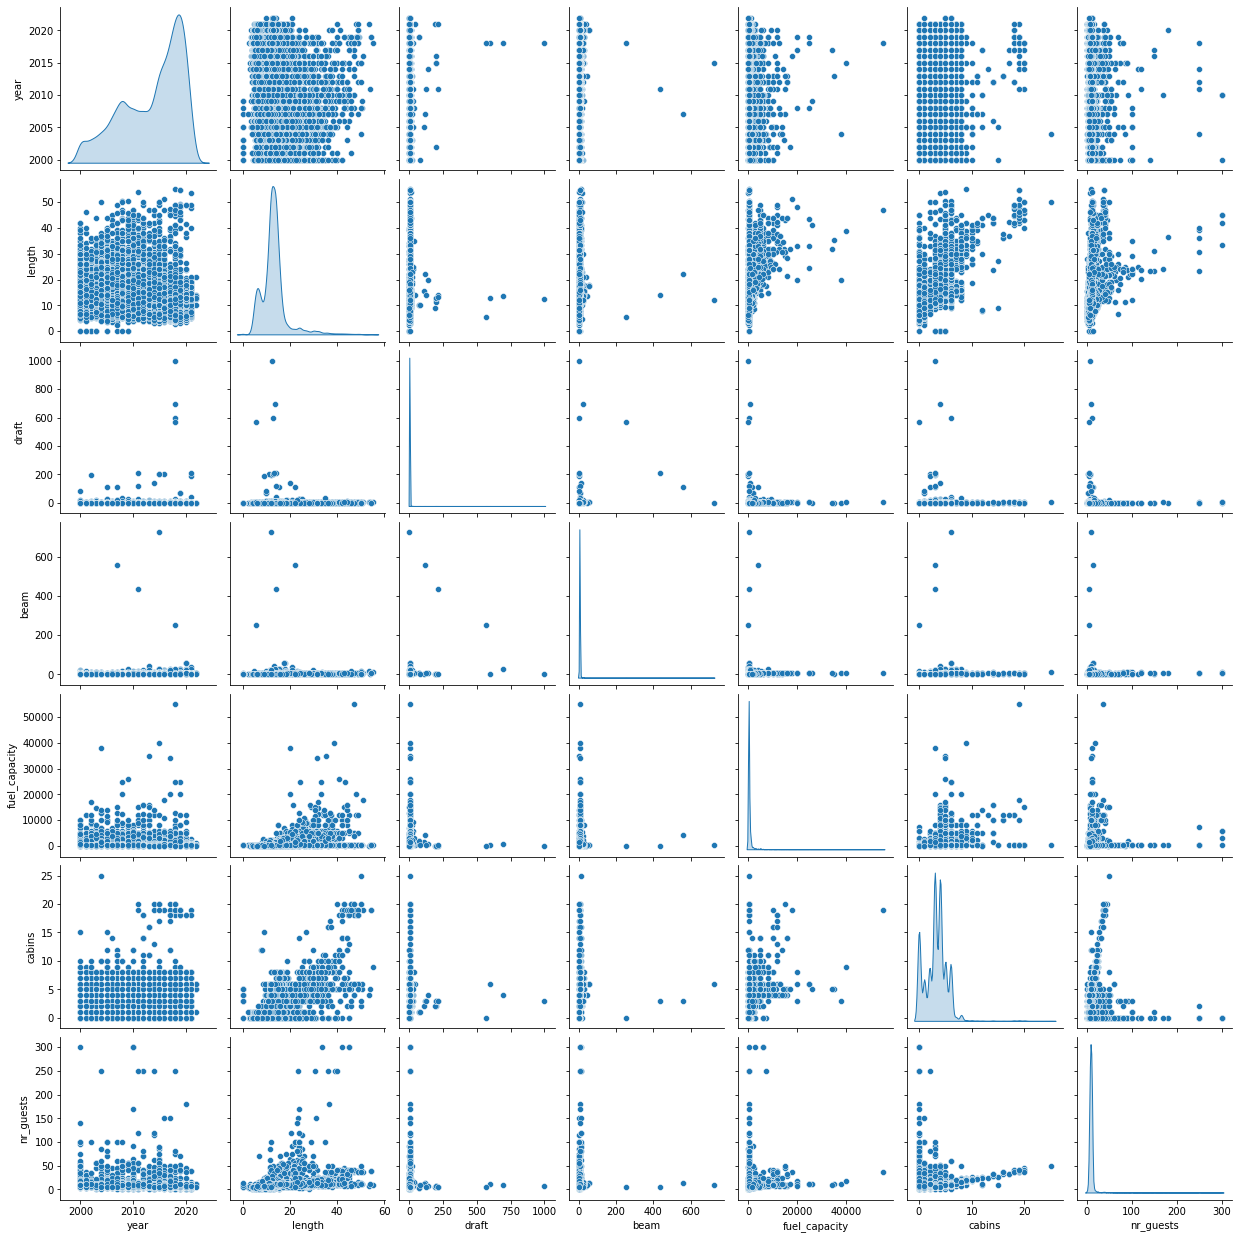

In [25]:
sns.pairplot(boats.drop(columns='charter_id'), diag_kind='kde')
plt.show()

we can see that we have some very big boats in our inventory! Let's see how each of the numeric fields changes with the boat type

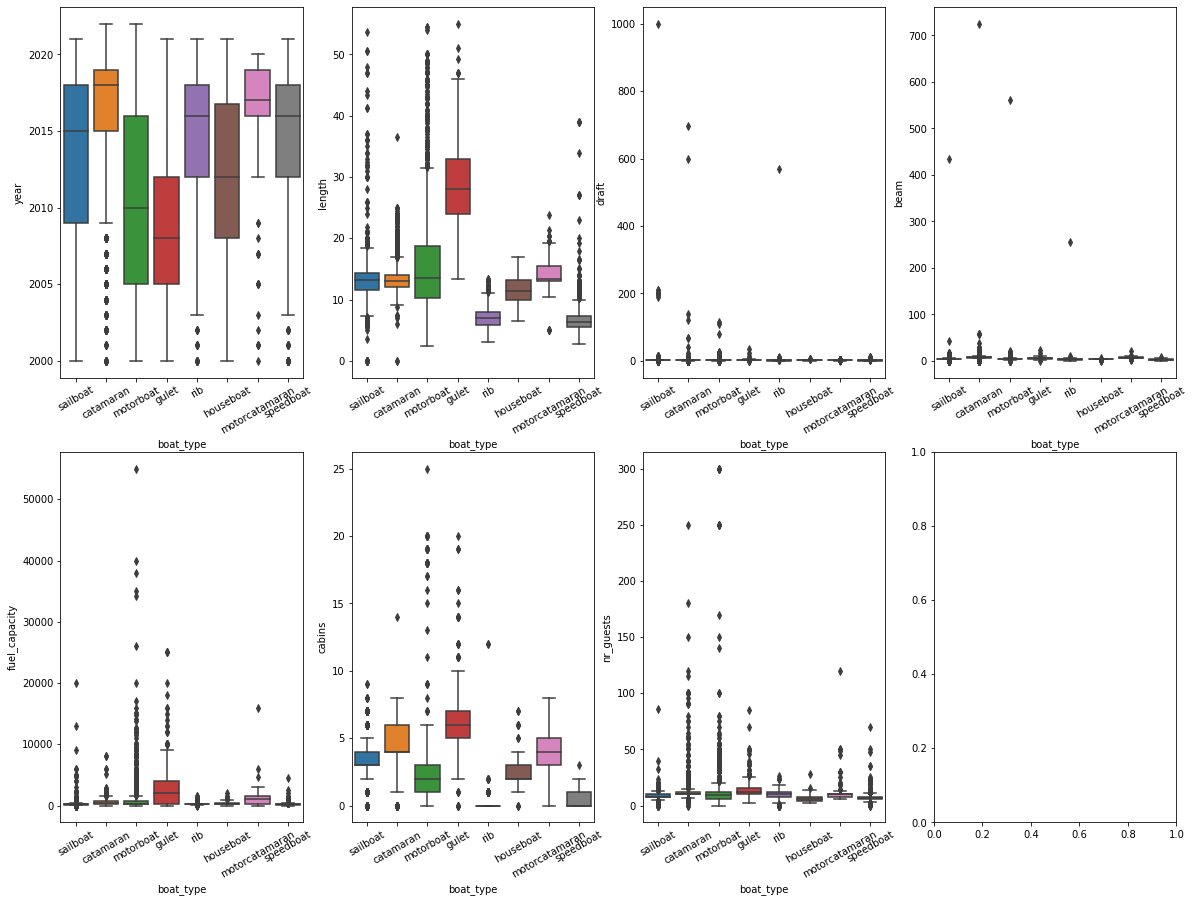

In [64]:
cols = boats.drop(columns=['boat_type','charter_id','boat_model', 'country_name', 'region']).columns

fig, ax = plt.subplots(2,4, figsize=(20,15))
y = 0

for i, col in enumerate(cols):
    if i >= 4:
        x = i - 4
    else:
        x = i
    p = sns.boxplot(y=col, x='boat_type', data=boats, ax=ax[y,x])
    p.set_xticklabels(p.get_xticklabels(), rotation=30)
    if i == 3:
        y = 1

    
plt.show()

it is very difficult to draw conclusions over all the charts, especially because there are a lot of extremes, but:
* catamaran and motorcatamaran are the most recent, whereas gullet the oldest on average
* gullets are by far the longest boats
* gullets are also the boats with the highest average fuel capacity and cabins, rib are the smallest

#### explore charters

In [65]:
charters.head()

,charter_id,country,is_one_day_charter,is_premium_charter,is_flexible_date_charter,is_daily_charter
0,1975,GR,False,False,False,False
1,2514,HR,False,False,False,False
2,3014,GR,False,False,False,False
3,758,HR,False,False,False,False
4,1789,VG,False,False,False,False


As we don't have numerical columns, no need to check for stats for the charters. What we can do is understanding the distributions of premium, flexible, daily

In [71]:
# count number of boats per boat type
print('\n', charters.groupby('is_one_day_charter')['is_one_day_charter'].count())
print('\n', charters.groupby('is_premium_charter')['is_premium_charter'].count())
print('\n', charters.groupby('is_flexible_date_charter')['is_flexible_date_charter'].count())
print('\n', charters.groupby('is_daily_charter')['is_daily_charter'].count())


 is_one_day_charter
False    3182
True       37
Name: is_one_day_charter, dtype: int64

 is_premium_charter
False    3162
True       57
Name: is_premium_charter, dtype: int64

 is_flexible_date_charter
False    3191
True       28
Name: is_flexible_date_charter, dtype: int64

 is_daily_charter
False    2839
True      380
Name: is_daily_charter, dtype: int64


In [73]:
charters.groupby('country')['country'].count().sort_values(ascending=False).head(15)

country
HR    665
GR    573
ES    398
IT    351
TR    183
US    152
DE    143
FR    140
GB     74
PT     66
NL     32
TH     32
ME     27
MT     25
MX     18
Name: country, dtype: int64

as expected Croatia and Greece are the places where the most charters are

#### Join boats and charters

In [75]:
boats_charters = boats.merge(charters, how='inner', on='charter_id')

In [76]:
boats_charters.head()

,boat_type,charter_id,boat_model,year,length,draft,beam,fuel_capacity,cabins,nr_guests,country_name,region,country,is_one_day_charter,is_premium_charter,is_flexible_date_charter,is_daily_charter
0,sailboat,1426,Cruiser 34,2009,10.70,1.90,3.60,150.0,2,6,Germany,North & Baltic sea,DE,False,False,False,False
1,houseboat,1426,1200,2006,12.50,1.00,3.95,500.0,3,8,Germany,North & Baltic sea,DE,False,False,False,False
2,sailboat,1426,311,2002,9.45,1.75,3.20,50.0,2,6,Germany,North & Baltic sea,DE,False,False,False,False
3,sailboat,1426,65,2010,6.50,1.30,2.10,10.0,1,4,Germany,North & Baltic sea,DE,False,False,False,False
4,sailboat,1426,Cruiser 39,2008,11.99,1.80,3.96,210.0,3,6,Germany,North & Baltic sea,DE,False,False,False,False


In [77]:
# at last let's check the charters with the most boats

In [79]:
boats_charters.groupby('charter_id')['charter_id'].count().sort_values(ascending=False).head(10)

charter_id
899     1055
1108     385
1163     325
2151     322
685      225
205      216
4132     212
889      211
2967     171
1383     155
Name: charter_id, dtype: int64

Charter 899 has more than 1000 boats in our database!